In [5]:
import pygame
import math
from pygame import gfxdraw
import importlib
import sys
from copy import deepcopy
from time import time
import numpy as np

NUMBER_OF_GAMES = 1000
firstName = 'randomBot'
secondName = 'randomBot'
firstPlayer = importlib.import_module(firstName)
secondPlayer = importlib.import_module(secondName)
firstTime = 0
secondTime = 0

GRAPHICS = False
maxTime = 0.01 if not GRAPHICS else 100

GSIZE = 8
BLACK = 1
WHITE = -1
firstwins = 0
secondwins = 0
size = 600
cellSize = size / GSIZE
rad = cellSize * 0.4
strokeWidth = 5
sideBarSize = 400
possibleMoves = dict()
player = 1

scores = np.zeros((60, GSIZE, GSIZE))

def initState():
    global whitePoints, blackPoints, table
    whitePoints = 0
    blackPoints = 0
    player = 1

    table = [[0 for _ in range(GSIZE)] for _ in range(GSIZE)]
    table[int(GSIZE/2)][int(GSIZE/2)] = 1
    table[int(GSIZE/2 - 1)][int(GSIZE/2 - 1)] = 1
    table[int(GSIZE/2 - 1)][int(GSIZE/2)] = -1
    table[int(GSIZE/2)][int(GSIZE/2 - 1)] = -1

def countPoints():
    global whitePoints, blackPoints

    whitePoints, blackPoints = 0, 0
    for i in range (GSIZE):
        for j in range (GSIZE):
            if table[i][j]==BLACK:
                blackPoints=blackPoints+1
            elif table[i][j]==WHITE:
                whitePoints=whitePoints+1

def givePoints(k, winner):
    for i in range (GSIZE):
        for j in range (GSIZE):
            if table[i][j]==winner:
                scores[k, i, j] += 1
            elif table[i][j]==-winner:
                scores[k, i, j] -= 1

def move(x, y):
    global possibleMoves
    global player
    if((x,y) in possibleMoves):
        for cX, cY in possibleMoves[(x, y)]:
            table[cX][cY] = player
        table[x][y] = player
        return True
    return False

def checkAllPossibleMoves():
    global player, possibleMoves
    possibleMoves = dict()
    for x in range(GSIZE):
        for y in range(GSIZE):

            if(table[x][y] == 0):
                changed = []
                for dX in (-1, 0, 1):
                    for dY in (-1, 0 ,1):
                        currX = x + dX
                        currY = y + dY
                        row = []
                        while(currX >= 0 and currX < GSIZE and currY < GSIZE and currY >= 0 and table[currX][currY] == player * -1):
                            row.append((currX, currY))
                            currX += dX
                            currY += dY
                        if(currX >= 0 and currX < GSIZE and currY < GSIZE and currY >= 0 and table[currX][currY] == player):
                            changed = changed + row

                if(len(changed) > 0):
                    possibleMoves[(x, y)] = changed

def ban(name):
    print("\nPermban gracza %s\n" % name)
    exit()

for i in range(NUMBER_OF_GAMES):
    initState()
    player = BLACK
    movesList = []
    winner = 0

    while True:
        checkAllPossibleMoves()
        if len(possibleMoves):
            x, y = firstPlayer.returnMove(deepcopy(table), list(possibleMoves.keys()), player)

            if move(x, y):
                movesList.append((x, y))
                player *= -1
        else:
            player *= -1
            checkAllPossibleMoves()
            if len(possibleMoves) == 0:
                countPoints()
                if whitePoints > blackPoints:
                    winner = WHITE
                elif blackPoints > whitePoints:
                    winner = BLACK
                break
    
    initState()
    player = BLACK
    for j in range(len(movesList)):
        checkAllPossibleMoves()
        if len(possibleMoves):
            x, y = movesList[j]
            
            move(x, y)
            if player == winner:
                givePoints(j, winner)
            player *= -1
    if i%100 == 0:
        print("Playing game %d" %i)


Playing game 0
Playing game 100
Playing game 200
Playing game 300
Playing game 400
Playing game 500
Playing game 600
Playing game 700
Playing game 800
Playing game 900


In [8]:
%pylab inline
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


/home/shab/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'table', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
def draw(s):
    sns.heatmap(s)

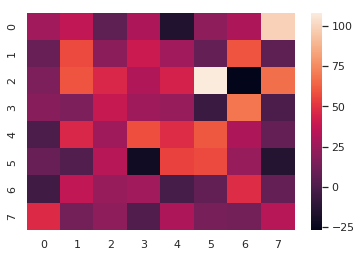

In [20]:
draw(scores[35])

In [21]:
scores[58]

array([[101., 112., 138., 120., 130., 131., 151., 128.],
       [108., 111.,  59.,  22.,  12.,  38.,  99., 112.],
       [118.,  58., 111.,  31.,  78.,  70.,  40., 123.],
       [116.,  78.,  26.,  49.,  77.,  19.,  22., 122.],
       [134.,  68.,  31.,  63.,  37.,  20.,  43., 137.],
       [123.,  51.,  65.,  33.,  39.,  75.,  47., 150.],
       [119.,  85.,  40.,  77.,  86.,  54., 113., 143.],
       [125., 143., 144., 153., 133., 120.,  93., 107.]])

In [23]:
scores.dump('scores.dt')

In [63]:
import yaml
s = open('/home/shab/school/si/4l/data.yml', "r")
f = np.array(yaml.load(s))

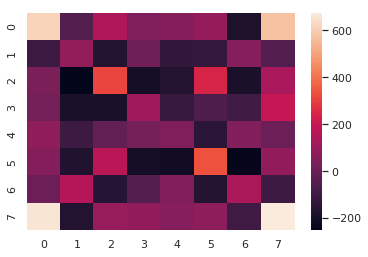

In [82]:
draw(f[30])

In [74]:
f[0]

array([[   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, -124,  -34,    0,    0,    0],
       [   0,    0, -102,   -4, -488,   14,    0,    0],
       [   0,    0,  -15, -488,  -76, -116,    0,    0],
       [   0,    0,    0,   -5, -146,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]])